In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep
from mplhep import *
linestyle_str = [
('solid', 'solid'), # Same as (0, ()) or '-'
('dotted', '.'),# Same as (0, (1, 1)) or '.'
('dashed', '--'),   # Same as '--'
('dashdot', '-.')]  # Same as '-.'
from matplotlib.pyplot import *
import matplotlib as mpl
plt.rc('text', usetex=True)
plt.rc('font', family='Times New Roman')
from  matplotlib import *
mpl.rcParams['figure.figsize'] = (10,6)
import sympy as sy
#sy.init_printing()
from sympy import *
from numpy import sqrt, pi
%matplotlib inline

In [2]:
gchi, MZp, gqV, gqL, gqR, Me, MMU, MTA, MU, MC, MT, MD, MS, MB, Mchi, Mq, X, gqA, gqV, cw = sy.symbols('gchi MZp gqV gqL gqR ME MMU Mta Mu Mc Mt Md MS Mb Mchi Mq X gqA gqV cw', real=True)
gZp = 1 
gsd = -2*gchi
#xev = MZp/(2*gchi)
gqA = 0
ychi = 1
MU = 0.00255
MC = 1.27
MT = 172
MD = 0.00504
MS = 0.101
MB = 4.7
Mchi= 65
gchi = 0.5
gqA = 0
MZp_list = list(range(500, 4000, 100))
gqV_list = [0.25]
gqL = (gqV_list[0] + gqA)/2
gqR = (gqV_list[0] - gqA)/2
#MZp_list


In [3]:
def BRZp(MZp__list, gqV__list):
    BRqq= []
    BRXdXd = []
    Zpqq_values = []
    ZpXdXd_values = []
    ZptotalW_values = []
    Zpbb = simplify(simplify(((-48*gqA**2*MB**2 + 48*gqA*gqL*gZp*MB**2 - 48*gqA*gqR*gZp*MB**2 - 6*gqL**2*gZp**2*MB**2 + 36*gqL*gqR*gZp**2*MB**2 - 6*gqR**2*gZp**2*MB**2 + 12*gqA**2*MZp**2 - 12*gqA*gqL*gZp*MZp**2 + 12*gqA*gqR*gZp*MZp**2 + 6*gqL**2*gZp**2*MZp**2 + 6*gqR**2*gZp**2*MZp**2)*sy.sqrt(-4*MB**2*MZp**2 + MZp**4))/(48*sy.pi*(MZp)**3)
                        ).subs(MB**2, X *MZp**2)).subs(X, MB**2 /MZp**2)
    Zpcc =simplify(simplify( (gZp**2*(gqA**2*(1 - (4*MC**2)/MZp**2) + gqV**2*(1 + (2*MC**2)/MZp**2))*sy.sqrt((1 - (4*MC**2)/MZp**2)*MZp**4))/(16*sy.sqrt(MZp**2)*sy.pi) 
                             ).subs(MC**2, X *MZp**2)).subs(X, MC**2 /MZp**2)
    Zpdd = simplify(simplify( ((-48*gqA**2*MD**2 + 48*gqA*gqL*gZp*MD**2 - 48*gqA*gqR*gZp*MD**2 - 6*gqL**2*gZp**2*MD**2 + 36*gqL*gqR*gZp**2*MD**2 - 6*gqR**2*gZp**2*MD**2 + 12*gqA**2*MZp**2 - 12*gqA*gqL*gZp*MZp**2 + 12*gqA*gqR*gZp*MZp**2 + 6*gqL**2*gZp**2*MZp**2 + 6*gqR**2*gZp**2*MZp**2)*sy.sqrt(-4*MD**2*MZp**2 + MZp**4))/(48*sy.pi*(MZp)**3)
                        ).subs(MD**2, X *MZp**2)).subs(X, MD**2 /MZp**2)
    Zpss = simplify(simplify( ((-48*gqA**2*MS**2 + 48*gqA*gqL*gZp*MS**2 - 48*gqA*gqR*gZp*MS**2 - 6*gqL**2*gZp**2*MS**2 + 36*gqL*gqR*gZp**2*MS**2 - 6*gqR**2*gZp**2*MS**2 + 12*gqA**2*MZp**2 - 12*gqA*gqL*gZp*MZp**2 + 12*gqA*gqR*gZp*MZp**2 + 6*gqL**2*gZp**2*MZp**2 + 6*gqR**2*gZp**2*MZp**2)*sy.sqrt(-4*MS**2*MZp**2 + MZp**4))/(48*sy.pi*(MZp)**3)
                        ).subs(MS**2, X *MZp**2)).subs(X, MS**2 /MZp**2)
    Zptt = simplify(simplify( (gZp**2*(gqA**2*(1 - (4*MT**2)/MZp**2) + gqV**2*(1 + (2*MT**2)/MZp**2))*sy.sqrt((1 - (4*MT**2)/MZp**2)*MZp**4))/(16*sy.sqrt(MZp**2)*sy.pi)
                             ).subs(MT**2, X *MZp**2)).subs(X, MT**2 /MZp**2)
    Zpuu = simplify(simplify(  (gZp**2*(gqA**2*(1 - (4*MU**2)/MZp**2) + gqV**2*(1 + (2*MU**2)/MZp**2))*sy.sqrt((1 - (4*MU**2)/MZp**2)*MZp**4))/(16*sy.sqrt(MZp**2)*sy.pi)
                              ).subs(MU**2, X *MZp**2)).subs(X, MU**2 /MZp**2)
    ZpXdXd = simplify(simplify( ((-16*gchi**2*Mchi**2 + 4*gchi**2*MZp**2)*sy.sqrt(-4*Mchi**2*MZp**2 + MZp**4))/(96*sy.pi*(MZp)**3)
                        ).subs(Mchi**2, X *MZp**2)).subs(X, Mchi**2 /MZp**2)
    Zpqq = Zpbb + Zpcc + Zpdd + Zpss + Zptt + Zpuu
    ZptotalW = Zpbb + Zpcc + Zpdd + Zpss + Zptt + Zpuu + ZpXdXd   
    
    for MZp_value in MZp_list:
        for gqV_value in gqV_list:
            Zpqq_value = Zpqq.subs({MZp: MZp_value, gqV: gqV_value}).evalf()
            ZptotalW_value = ZptotalW.subs({MZp: MZp_value, gqV: gqV_value}).evalf()
            ZpXdXd_value = ZpXdXd.subs({MZp: MZp_value}).evalf()
            Zpqq_values.append(Zpqq_value)
            ZptotalW_values.append(ZptotalW_value)
            ZpXdXd_values.append(ZpXdXd_value)
            BRqq.append((Zpqq_value / ZptotalW_value).evalf())
            BRXdXd.append((ZpXdXd_value / ZptotalW_value).evalf())
    return BRqq, BRXdXd, Zpqq_values, ZptotalW_values, ZpXdXd_values
BRqq_list, BRXdXd_list, Zpqq_list, ZptotalW_list, ZpXdXd_list = BRZp(MZp, gqV)
#BRqq_list
#Zpqq_list
#ZptotalW_list
#ZpXdXd_list
#BRXdXd_list


In [4]:
gqV_list = [0.24]
BRqq_list2, BRXdXd_list2, Zpqq_list2, ZptotalW_list2, ZpXdXd_list2 = BRZp(MZp, gqV)

In [5]:
gqV_list = [0.23]
BRqq_list3, BRXdXd_list3, Zpqq_list3, ZptotalW_list3, ZpXdXd_list3 = BRZp(MZp, gqV)

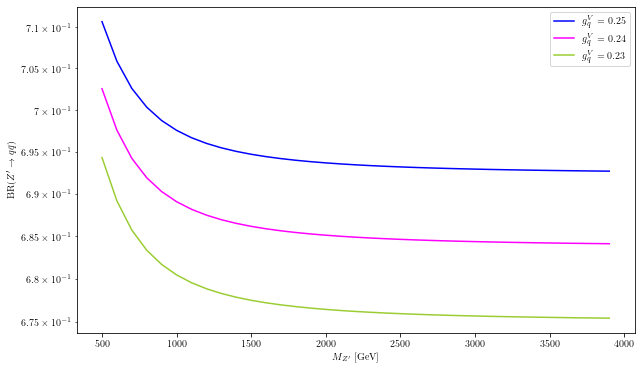

In [6]:
plt.figure(figsize=(10,6))
plt.plot(MZp_list, BRqq_list, label=r'$g_{q}^{V} = $ 0.25 ', color='blue', linestyle='solid')
plt.plot(MZp_list, BRqq_list2, label=r'$g_{q}^{V} = $ 0.24', color='magenta', linestyle='solid')
plt.plot(MZp_list, BRqq_list3, label=r'$g_{q}^{V} = 0.23$', color='yellowgreen', linestyle='solid')
plt.xlabel(r'$M_{Z^{\prime}}$ [GeV]')
plt.ylabel(r'BR($Z^{\prime} \rightarrow q\bar{q}$)')
plt.yscale('log')
plt.legend()
plt.show()


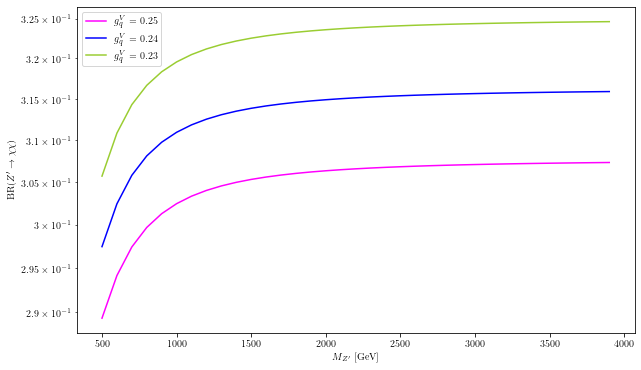

In [10]:
plt.figure(figsize=(10,6))
plt.plot(MZp_list, BRXdXd_list, label=r'$g_{q}^{V} = $ 0.25 ', color='magenta', linestyle='solid')
plt.plot(MZp_list, BRXdXd_list2, label=r'$g_{q}^{V} = $ 0.24 ', color='blue', linestyle='solid')
plt.plot(MZp_list, BRXdXd_list3, label=r'$g_{q}^{V} = $ 0.23', color='yellowgreen', linestyle='solid')
plt.xlabel(r'$M_{Z^{\prime}}$ [GeV]')
plt.ylabel(r'BR($Z^{\prime} \rightarrow \chi \chi$)')
plt.yscale('log')
plt.legend()
plt.show()